# Script 18: Lendo Diversos Campos em Diversos Níveis - Índice Galvez Davison (GDI)
Neste script vamos ler vários campos (pressão na superfície, Temperatura e Umidade Específica) em diversos níveis (950 hPa, 850 hPa, 700 hPa e 500 hPa) e realizar diversos cálculos necessários para plotar o Índice Galvez Davison (GDI).

Fonte: https://www.wpc.ncep.noaa.gov/international/gdi/ Treinamento: https://rammb2.cira.colostate.edu/training/rmtc/focusgroup/ GDI_Equations.jpg GDI_Table.jpg

Init: 2021-07-16 00:00:00 UTC
Run: 00Z
Forecast: +0
Valid: 2021-07-16 00:00:00 UTC


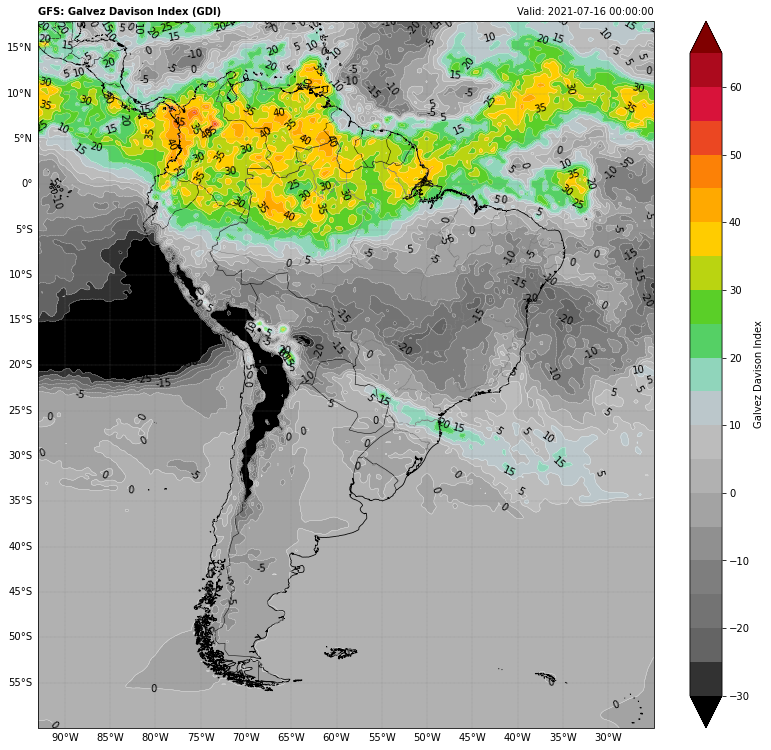

In [1]:
#-----------------------------------------------------------------------------------------------------------
# Curso INPE / CPTEC Training: NWP Data Processing With Python - Script 18: Galvez Davison Index (GDI) 
# Instrutor: Diego Souza
# Adaptado: Dejanira F Braz
HUGE THANKS TO JUAN AMIDES FIGUEROA (MARN EL SALVADOR) AND JOSE GALVEZ
#-----------------------------------------------------------------------------------------------------------
import pygrib                              # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import matplotlib.pyplot as plt            # Plotting library
import cartopy, cartopy.crs as ccrs        # Plot maps
import cartopy.io.shapereader as shpreader # Import shapefiles
import numpy as np                         # Scientific computing with Python
import matplotlib                          # Comprehensive library for creating static, animated, and interactive visualizations in Python
import math                                # Methematical Functions
#----------------------------------------------------------------------------------------------------------- 

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-93.0, -60.00, -25.00, 18.00]

# Open the GRIB file
grib = pygrib.open("Samples/gfs.t00z.pgrb2.0p50.f000")

#-----------------------------------------------------------------------------------------------------------

# Read the surface pressure
sfcps = grib.select(name='Surface pressure')[0]

# Get information from the file    
init  = str(sfcps.analDate)      # Init date / time
run   = str(sfcps.hour).zfill(2) # Run
ftime = str(sfcps.forecastTime)  # Forecast hour
valid = str(sfcps.validDate)     # Valid date / time 
print('Init: ' + init + ' UTC')
print('Run: ' + run + 'Z')
print('Forecast: +' + ftime)
print('Valid: ' + valid + ' UTC')

# Read the data for a specific region
sfcps, lats, lons = sfcps.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

# Convert the surface pressure to hectopascal
sfcps = sfcps / 100

#-----------------------------------------------------------------------------------------------------------
# Read the temperature in 950 hPa
temp950 = grib.select(name='Temperature', typeOfLevel = 'isobaricInhPa', level = 950)[0]

# Read the data for a specific region
temp950 = temp950.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]
#-----------------------------------------------------------------------------------------------------------
# Read the specific humidity in 950 hPa
spfh950 = grib.select(name='Specific humidity', typeOfLevel = 'isobaricInhPa', level = 950)[0]

# Read the data for a specific region
R950 = spfh950.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]
#-----------------------------------------------------------------------------------------------------------
# Read the temperature in 850 hPa
temp850 = grib.select(name='Temperature', typeOfLevel = 'isobaricInhPa', level = 850)[0]

# Read the data for a specific region
temp850 = temp850.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]
#-----------------------------------------------------------------------------------------------------------
# Read the specific humidity in 850 hPa
spfh850 = grib.select(name='Specific humidity', typeOfLevel = 'isobaricInhPa', level = 850)[0]

# Read the data for a specific region
R850 = spfh850.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]
#-----------------------------------------------------------------------------------------------------------
# Read the temperature in 700 hPa
temp700 = grib.select(name='Temperature', typeOfLevel = 'isobaricInhPa', level = 700)[0]

# Read the data for a specific region
temp700 = temp700.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]
#-----------------------------------------------------------------------------------------------------------
# Read the specific humidity in 700 hPa
spfh700 = grib.select(name='Specific humidity', typeOfLevel = 'isobaricInhPa', level = 700)[0]

# Read the data for a specific region
R700 = spfh700.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]
#-----------------------------------------------------------------------------------------------------------
# Read the temperature in 500 hPa
temp500 = grib.select(name='Temperature', typeOfLevel = 'isobaricInhPa', level = 500)[0]

# Read the data for a specific region
temp500 = temp500.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]
#-----------------------------------------------------------------------------------------------------------
# Read the specific humidity in 500 hPa
spfh500 = grib.select(name='Specific humidity', typeOfLevel = 'isobaricInhPa', level = 500)[0]

# Read the data for a specific region
R500 = spfh500.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]
#-----------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------

# Calculate the Theta 950
T950 = ((temp950)*(pow((1000/950),(2/7))))

# Calculate the Theta 850
T850 = ((temp850)*(pow((1000/850),(2/7))))

# Calculate the Theta 700
T700 = ((temp850)*(pow((1000/700),(2/7))))

# Calculate the Theta 500
T500 = ((temp500)*(pow((1000/500),(2/7))))

#-----------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------

# Layer-averaged thetas and mixing ratios
THETAA = T950
A1 = T850 + T700
THETAB = 0.5 * A1
THETAC = T500
RA = R950
C2 = R850 + R700
RB = 0.5 * C2
RC = R500

#---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------

# Calculate the Theta-E (EPT) Proxys 
L0 = 2690000
alpha = -10
cpd = 1005.7
p1 = L0 * RA
p2 = L0 * RB
p3 = L0 * RC
p4 = cpd * T850
x1 = p1 / p4
x2 = p2 / p4
x3 = p3 / p4 
y1 = np.exp(x1)
y2 = np.exp(x2)
y3 = np.exp(x3)
EPTPA = THETAA * y1
EPTPB = THETAB * y2 + alpha
EPTPC = THETAC * y3 + alpha

#---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------

# Calculate the EPT Core Index (ECI)
beta = 303
ME = EPTPC - beta
LE = EPTPA - beta
gamma= 0.065

# Decide the value of the ECI
ECI = np.where(LE <= 0, 0, gamma * LE * ME)

#---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------

# Calculate the Mid Warming Index (MWI)
tau = 263.15
mu = -7
calc1 = temp500 - tau

# Decide the value of the MWI
MWI = np.where(calc1 <= 0, 0, calc1 * mu)

#---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------

# Calculate the Inversion Index (II)
sigma = 1.5
op1 = temp950 - temp700
S = sigma * op1
op2 = EPTPB - EPTPA
D = sigma * op2
calc2 = D + S

# Decide the value of the II
II = np.where(calc2 <= 0, D + S, 0)

#---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------

# Orography correction just to aid visualization for forecaster. Co is added to the GDI
pp1 = 500
pp2 = 9000
pp3 = 18
divisor = sfcps - pp1
division = pp2 / divisor
C0 = pp3 - division

#---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------

# Galvez Davison Index - Indices with and without correction
GDI = ECI + MWI + II
GDIc = ECI + MWI + II + C0

# Smooth the contours
import scipy.ndimage
GDIc = scipy.ndimage.zoom(GDIc, 3)
lats = scipy.ndimage.zoom(lats, 3)
lons = scipy.ndimage.zoom(lons, 3)

#-----------------------------------------------------------------------------------------------------------

# Choose the plot size (width x height, in inches)
plt.figure(figsize=(13,13))

# Use the Cilindrical Equidistant projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('Shapefile/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Define de contour interval
data_min = -30 
data_max = 70 
interval = 5
levels = np.arange(data_min,data_max,interval)

# Create the color scale 
colors = ["#323232", "#646464", "#737373", "#7e7e7e", "#909090", "#a3a3a3", "#b1b1b1", "#bcbcbc", "#bbc7cb", "#b2d2dd", "#90d5bb", "#55d065", "#5acf28", "#bad411", "#ffcc00", "#ffa900", "#fc8106", "#eb4722", "#d8133a", "#ac0a1d"]
cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_over('#800000')
cmap.set_under('#000000')

# Plot the contours
img1 = ax.contourf(lons, lats, GDIc, cmap=cmap, levels=levels, extend='both')    
img2 = ax.contour(lons, lats, GDIc, colors='white', linewidths=0.3, levels=levels)
ax.clabel(img2, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'black')

# Add a colorbar
plt.colorbar(img1, label='Galvez Davison Index', orientation='vertical', pad=0.05, fraction=0.05)

# Add a title
plt.title('GFS: Galvez Davison Index (GDI)' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('Figure/image_18.png')

# Show the image
plt.show()